TrackSummaryS12/FitResults/pValues
TrackSummaryS12/FitResults/pValues
TrackSummaryS18/FitResults/pValues
TrackSummaryS18/FitResults/pValues
TrackSummaryS12/FitResults/P
TrackSummaryS12/FitResults/P
TrackSummaryS18/FitResults/P
TrackSummaryS18/FitResults/P


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 
Info in <TCanvas::Print>: png file ComparisionPlots4.png has been created


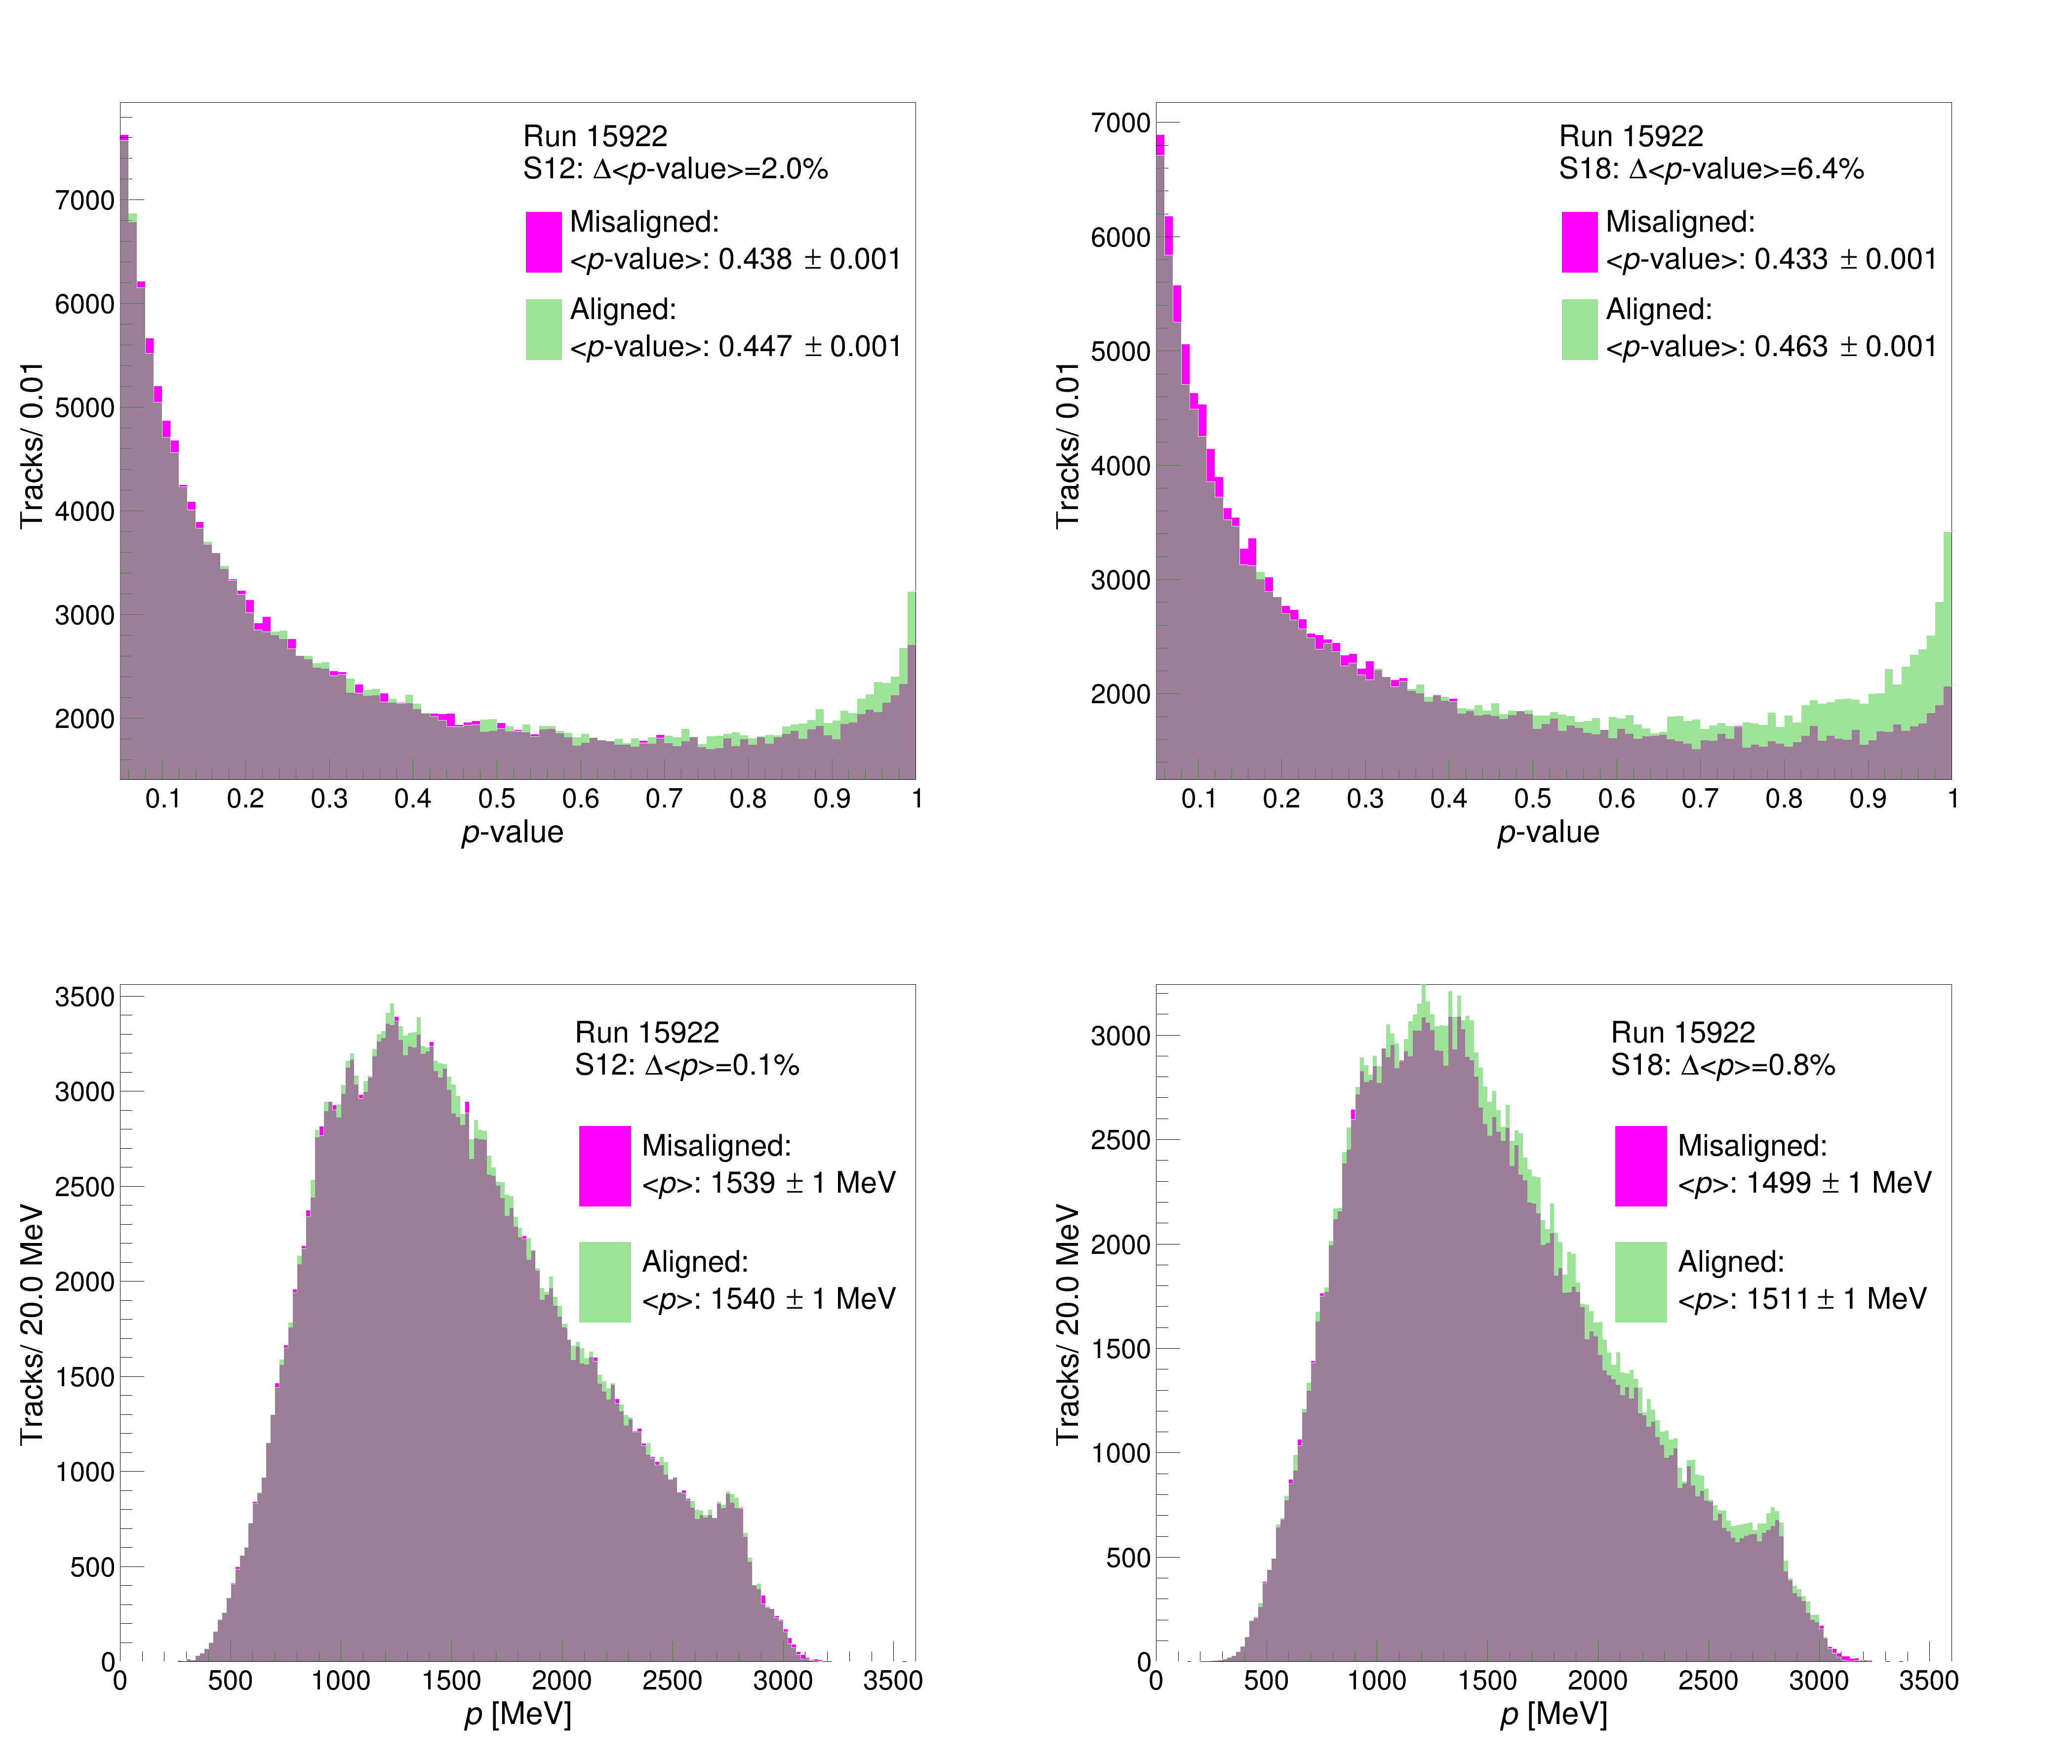

In [27]:
import sys
sys.path.append("/usr/local/Cellar/root/6.16.00_3/lib/root")
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1, gROOT
import matplotlib.pyplot as plt #for plotting 
import numpy as np  # smart arrays 
import itertools # smart lines 
import argparse, sys
from math import log10, floor
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import subprocess
def round_sig(x, sig=2):
	return round(x, sig-int(floor(log10(abs(x))))-1)

from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle, TPaveText, TLegend
from decimal import *
round_to = 3 
getcontext().prec = round_to

#Define constant paths and labels 
TfileName = "gm2tracker_ana.root"
stationName = ["12", "18"]
# tracker = ["Tracker 1", "Tracker 2"]
tracker = ["S12", "S18"]
scr_nominal= "/Users/gleb/software/alignTrack/mpIIDESY/15922_Iter1/"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/15922_Iter3/"
path = ["", ""]
for i_station in range(0, len(stationName)):
    path[i_station] = "TrackSummaryS"+stationName[i_station]+"/FitResults/"


#Containers to store histograms in orders as the names 
names = ["Misaligned", "Aligned"]
stateN=len(names)
meanArray=[] # for the final FoM shift-nominal 

colors = [6, 8] #purple, green 
styles = [3001, 3002]

plotName = ["pValues", "P"]
plotXTitle = ["#it{p}-value", "#it{p}"]
plotTitle = ["#Delta<#it{p}-value>=", "#Delta<#it{p}>="]
units = ["", "MeV"]


#Make new canvas for plots 
c = TCanvas("", "", 4200, 3600)
c.Divide(2,2)
#Keep legend, histots and TFiles in scope 
legendArray=[]
histArray=[]
fileArray=[]

i_total=0 # canvas id counter 
for i_plot in range(0, len(plotName)):
    for i_station in range(0, len(stationName)):

        #Open TFiles
        scrFile_nominal = TFile.Open(scr_nominal+TfileName)
        scrFile_shift = TFile.Open(scr_shift+TfileName)
        fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and global shift (1)  
        fileArray.append(fileName)

        c.cd(i_total+1)
        if (i_plot == 0):
            legend =  TLegend(0.5,0.58,0.71,0.89)
        if (i_plot == 1):
            legend =  TLegend(0.55,0.48,0.85,0.89)
        legendArray.append(legend) # stroe all to keep in scope 
        for i_state in range(0, stateN):
           
            #Get the TH1F 
            plot = fileName[i_state].Get(str(path[i_station]+plotName[i_plot])) 
            print(str(path[i_station]+plotName[i_plot]))
            histArray.append(plot)
            plot.Rebin(2)
            
            if(i_plot==0):
                # set the cut on p-values 
                plot.GetXaxis().SetRangeUser(0.05, 1) 
                mean= plot.GetMean()
                mean_error =plot.GetMeanError()
                plot.GetXaxis().SetTitle(plotXTitle[i_plot]+" "+units[i_plot]+"")
                
            
            if(i_plot==1):
                #nearest MeV 
                mean=round(plot.GetMean())
                mean_error = round(plot.GetMeanError())
                plot.GetXaxis().SetTitle(plotXTitle[i_plot]+" ["+units[i_plot]+"]")
            
            meanArray.append(mean)
                
            
            plot.SetLineColor(0)
            plot.SetFillStyle(1)
            plot.GetXaxis().CenterTitle()
           
            binN=plot.GetBinWidth(1)
            plot.GetYaxis().SetTitle("Tracks/ "+str(binN)+" "+units[i_plot])
            plot.GetYaxis().SetTitleSize(0.04)
            plot.GetXaxis().SetTitleSize(0.04)
            plot.GetYaxis().CenterTitle()
#              plot.GetXaxis().SetTitleOffset(1.1)
            plot.GetYaxis().SetTitleOffset(1.4)
            
            
            if (i_state == 0):
                plot.SetFillColorAlpha(colors[i_state], 1.0)
                plot.Draw("")
                
            else:
                plot.SetFillColorAlpha(colors[i_state], 0.6)
                plot.Draw("same")
            
            #fill legend once per state      
            legenValue1 = "#splitline{"+str(names[i_state])+":}{<"+plotXTitle[i_plot]+">: "+str(round(mean, round_to))+" #pm "+str(round(mean_error, round_to))+" "+units[i_plot]+"}"
            legend.AddEntry(plot, str(legenValue1), "f")
        
        #draw legend once per canvas 
#         legend.SetHeader("#splitline{Run 15922}{S"+stationName[i_station]+": "+plotTitle[i_plot]+str(round(meanArray[1]-meanArray[0], round_to))+" ("+str(round( (meanArray[1]-meanArray[0])/meanArray[1]*100, 1))+"%)}", "")
        legend.SetHeader("#splitline{Run 15922}{"+tracker[i_station]+": "+plotTitle[i_plot]+str(round( (meanArray[1]-meanArray[0])/meanArray[1]*100, 1))+"%}", "")
        legend.Draw("same")
        i_total+=1
        meanArray=[]
        gStyle.SetOptStat(0) 
        gStyle.SetOptFit(0)
        gStyle.SetLegendBorderSize(0)
        gStyle.SetLegendTextSize(0.038)

c.Draw()
c.Print("ComparisionPlots"+str(i_total)+".png")
